In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.mlab import griddata
import numpy.ma as ma
from scipy import interpolate
%matplotlib inline

In [25]:
data=pd.read_csv("./ver_hresvs_vs_gmt",sep="\s+",names=["lon","lat","dep","val","x"])

In [26]:
data

,lon,lat,dep,val,x
0,145.000,30.000,0.0,-1000.0000,0.0
1,144.945,30.076,0.0,-1000.0000,10.0
2,144.890,30.153,0.0,-1000.0000,20.0
3,144.835,30.229,0.0,-1000.0000,30.0
4,144.780,30.305,0.0,-1000.0000,40.0
5,144.725,30.381,0.0,-1000.0000,50.0
6,144.669,30.458,0.0,-1000.0000,60.0
7,144.614,30.534,0.0,-1000.0000,70.0
8,144.558,30.610,0.0,-1000.0000,80.0
9,144.503,30.686,0.0,-1000.0000,90.0


In [41]:
x=data.x.values

In [42]:
y=data.dep.values

In [43]:
z=data.val.values

In [44]:
z[z==-1000.0]=np.nan

In [45]:
# define grid.
xi = np.linspace(np.min(x),np.max(x),1000)
yi = np.linspace(np.min(y),np.max(y),1000)

In [47]:
zi = griddata(x,y,z,xi,yi,interp='linear')

/usr/local/anaconda3/envs/seismology/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: The griddata function was deprecated in Matplotlib 2.2 and will be removed in 3.1. Use scipy.interpolate.griddata instead.
  """Entry point for launching an IPython kernel.


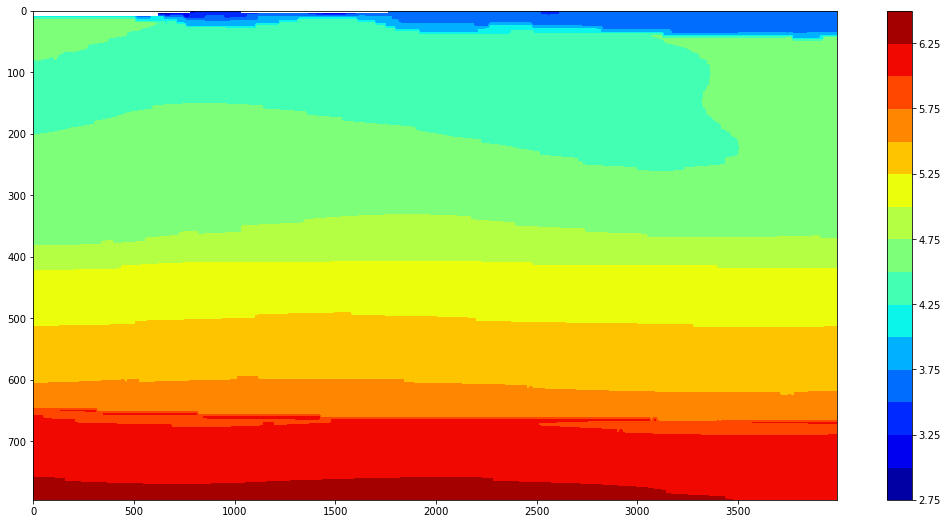

In [54]:
plt.figure(figsize=(18,9))
CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet)
plt.colorbar() # draw colorbar
plt.gca().invert_yaxis()
plt.show()

In [56]:
ref=pd.read_csv("./STW105.txt",sep="\s+",names=["radius","density","vpv","vsv","kappa","miu","vph","vsh","eta"])

In [57]:
ref

,radius,density,vpv,vsv,kappa,miu,vph,vsh,eta
0,0.0,13088.48,11262.20,3667.80,1327.6,104.0,11262.20,3667.80,1.0
1,6824.0,13088.47,11262.20,3667.79,1327.6,104.0,11262.20,3667.79,1.0
2,13648.0,13088.44,11262.18,3667.78,1327.6,104.0,11262.18,3667.78,1.0
3,20472.0,13088.39,11262.14,3667.75,1327.6,104.0,11262.14,3667.75,1.0
4,27296.0,13088.32,11262.09,3667.72,1327.6,104.0,11262.09,3667.72,1.0
5,34120.0,13088.22,11262.02,3667.67,1327.6,104.0,11262.02,3667.67,1.0
6,40944.0,13088.11,11261.94,3667.62,1327.6,104.0,11261.94,3667.62,1.0
7,47768.0,13087.98,11261.85,3667.55,1327.6,104.0,11261.85,3667.55,1.0
8,54592.0,13087.83,11261.74,3667.47,1327.6,104.0,11261.74,3667.47,1.0
9,61416.0,13087.66,11261.61,3667.39,1327.6,104.0,11261.61,3667.39,1.0


In [61]:
f = interpolate.interp1d((6371000.0-ref.radius)/1000, ref.vsh/1000.0)

In [85]:
z=data.val.values/f(y)
z[z<0]=0
z[np.isnan(z)]=0
z[z==-1000.0]=np.nan

/usr/local/anaconda3/envs/seismology/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/envs/seismology/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


In [86]:
z=(z-1)

In [87]:
z[z==-1]=0

In [88]:
z

array([ 0.        ,  0.        ,  0.        , ..., -0.00120016,
       -0.00115221, -0.00115221])

In [89]:
zi = griddata(x,y,z,xi,yi,interp='linear')

/usr/local/anaconda3/envs/seismology/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: The griddata function was deprecated in Matplotlib 2.2 and will be removed in 3.1. Use scipy.interpolate.griddata instead.
  """Entry point for launching an IPython kernel.


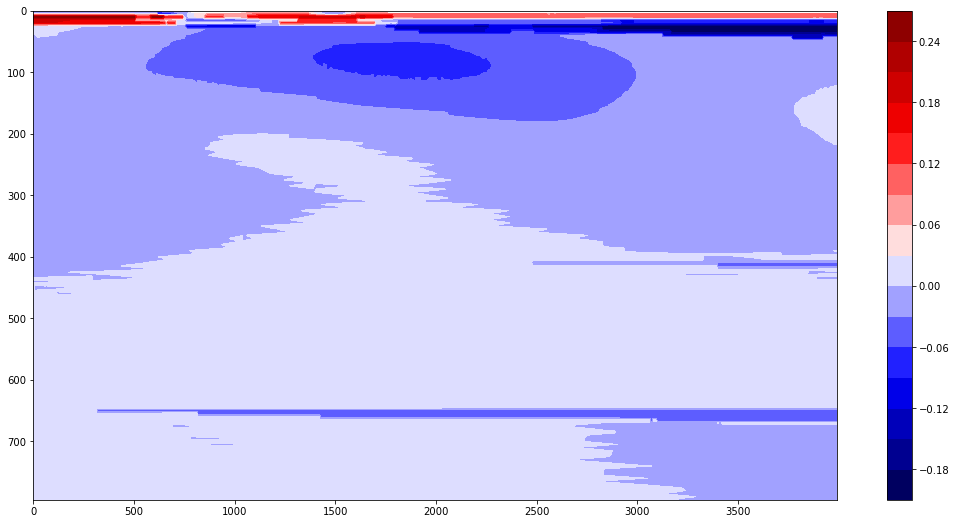

In [91]:
plt.figure(figsize=(18,9))
CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.seismic)
plt.colorbar() # draw colorbar
plt.gca().invert_yaxis()
plt.show()

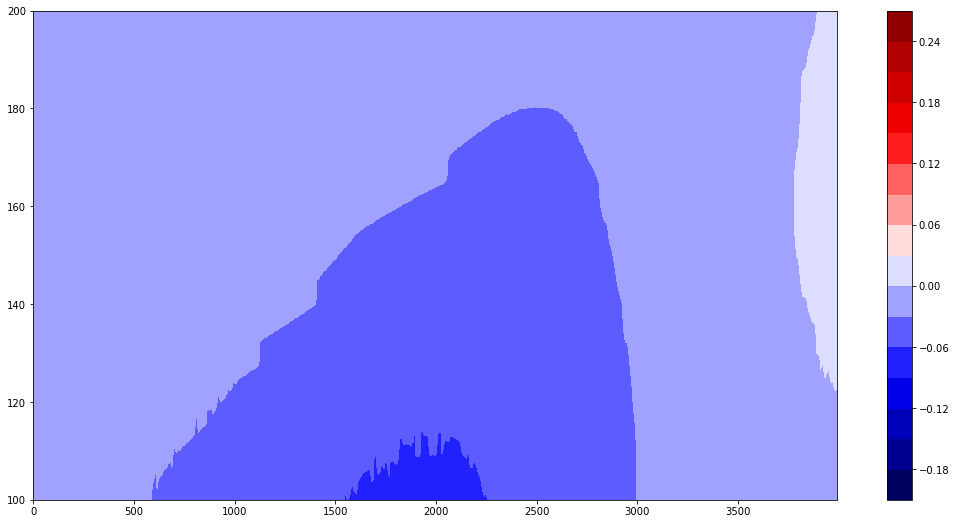

In [99]:
plt.figure(figsize=(18,9))
plt.gca().invert_yaxis()
plt.ylim(100,200)
CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.seismic)
plt.colorbar() # draw colorbar
plt.show()

In [96]:
?plt.yscale